<a href="https://colab.research.google.com/github/Fariya082/Project/blob/main/PP10_05_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: "Event Management System"

Create a Python application that helps users organize and manage events by tracking details
such as attendees, schedules, and budgets.

Task 1
Event Creation and Management
● Allow users to create new events with the following details:
○ Event Name.
○ Date and Time.
○ Location.
○ Description.
● Store event details in a CSV or JSON file.
● Provide options to edit or delete events.

In [105]:
from google.colab import files
files.upload()

Saving MOCK_DATA.csv to MOCK_DATA (2).csv


{'MOCK_DATA (2).csv': b'event_name,Date_&_time,Location,Description\nBirthday Party,05/01/2024,Suite 41,Mauris lacinia sapien quis libero. Nullam sit amet turpis elementum ligula vehicula consequat. Morbi a ipsum. Integer a nibh. In quis justo.\nArt Exhibition,07/01/2024,Room 782,"Nam dui. Proin leo odio, porttitor id, consequat in, consequat ut, nulla. Sed accumsan felis. Ut at dolor quis odio consequat varius. Integer ac leo. Pellentesque ultrices mattis odio. Donec vitae nisi. Nam ultrices, libero non mattis pulvinar, nulla pede ullamcorper augue, a suscipit nulla elit ac nulla. Sed vel enim sit amet nunc viverra dapibus."\nFitness Bootcamp,11/10/2024,7th Floor,"Duis bibendum, felis sed interdum venenatis, turpis enim blandit mi, in porttitor pede justo eu massa."\nCooking Class,11/11/2024,Suite 73,"Duis at velit eu est congue elementum. In hac habitasse platea dictumst. Morbi vestibulum, velit id pretium iaculis, diam erat fermentum justo, nec condimentum neque sapien placerat ante

In [106]:
import pandas as pd

df = pd.read_csv('/content/MOCK_DATA.csv')

In [107]:
df.head()

,event_name,Date_&_time,Location,Description
0,Birthday Party,05/01/2024,Suite 41,Mauris lacinia sapien quis libero. Nullam sit ...
1,Art Exhibition,07/01/2024,Room 782,"Nam dui. Proin leo odio, porttitor id, consequ..."
2,Fitness Bootcamp,11/10/2024,7th Floor,"Duis bibendum, felis sed interdum venenatis, t..."
3,Cooking Class,11/11/2024,Suite 73,Duis at velit eu est congue elementum. In hac ...
4,Cooking Class,15/11/2024,Suite 77,"In tempor, turpis nec euismod scelerisque, qua..."


In [108]:
df.isnull()

,event_name,Date_&_time,Location,Description
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False
998,False,False,False,False


In [84]:
df[0:1]

,event_name,Date_&_time,Location,Description
0,Birthday Party,05/01/2024,Suite 41,Mauris lacinia sapien quis libero. Nullam sit ...


# Task 2. Attendee Management
● Enable users to add, view, and remove attendees for each event.
● Track attendee details like:
○ Name.
○ Email.
○ RSVP Status (Confirmed/Declined/Maybe).
● Store attendee information in a structured format and associate it with specific events.

Enable users to add, view, and remove attendees for each event.

In [85]:
def insert_data(df, new_df):
  df = pd.concat([df, new_df], ignore_index= True)
  return df


## ● Store attendee information in a structured format and associate it with specific events.

In [86]:
Attendee_Name = input("Enter attendee name: ")
Attendee_email = input("Enter attendee email: ")
RSVP_Status = input("Enter rsvp status: ")
event_name = input("Enter event name: ")

new_df = pd.DataFrame({'Attendee_Name':[Attendee_Name], 'Attendee_Email':[Attendee_email], 'RSVP_Status':[RSVP_Status]})
df = insert_data(df, new_df)


Enter attendee name: Ema
Enter attendee email: ema123@gmail.com
Enter rsvp status: maybe
Enter event name: Birthday Party


In [87]:
df.shape

(1001, 7)

In [110]:
df.tail()

,event_name,Date_&_time,Location,Description
995,Cooking Class,04/02/2024,1st Floor,Vivamus in felis eu sapien cursus vestibulum. ...
996,Charity Gala,15/02/2024,Apt 1575,Vestibulum ac est lacinia nisi venenatis trist...
997,Cooking Class,12/06/2024,Apt 1005,Ut at dolor quis odio consequat varius. Intege...
998,Film Screening,14/09/2024,Room 66,"Morbi sem mauris, laoreet ut, rhoncus aliquet,..."
999,Art Exhibition,30/10/2024,Room 203,Maecenas pulvinar lobortis est. Phasellus sit ...


In [89]:
df.isnull().sum()

,0
event_name,1
Date_&_time,1
Location,1
Description,1
Attendee_Name,1000
Attendee_Email,1000
RSVP_Status,1000


In [90]:
print(df.shape)

df = df.dropna()
df.isnull().sum()

print(df.shape)

(1001, 7)
(0, 7)


In [99]:
df = df.fillna({'Attendee_name': "Unknown", 'Attendee_Email': "Unknown", 'RSVP_Status': "Unknown"})
df.isnull().sum()

,0
event_name,0
Date_&_time,0
Location,0
Description,0
Attendee_Name,0
Attendee_Email,0
RSVP_Status,0


## Schedule Management
● Display a list of upcoming events with their dates and times.
● Allow users to filter events by date or location.
● Send a reminder (via console) for events occurring within the next 24 hours.

In [100]:
def insert_data(df, new_df):
    df = pd.concat([df, new_df], ignore_index=True)
    return df

In [101]:
def update_event_name_df(event_name, update_event_name):
  df.loc[df['event_name']== event_name, 'event_name'] = update_event_name
  return df



In [111]:
def filter_df(df, collume_name, search_key):
  searched_df = df[df[collume_name] == search_key]
  if searched_df.empty:
    return f"No data found with search_key: {search_key}"
  else:
    return searched_df

In [109]:
df.head()

,event_name,Date_&_time,Location,Description
0,Birthday Party,05/01/2024,Suite 41,Mauris lacinia sapien quis libero. Nullam sit ...
1,Art Exhibition,07/01/2024,Room 782,"Nam dui. Proin leo odio, porttitor id, consequ..."
2,Fitness Bootcamp,11/10/2024,7th Floor,"Duis bibendum, felis sed interdum venenatis, t..."
3,Cooking Class,11/11/2024,Suite 73,Duis at velit eu est congue elementum. In hac ...
4,Cooking Class,15/11/2024,Suite 77,"In tempor, turpis nec euismod scelerisque, qua..."


In [112]:
search_by_event_name = input("Enter the event name: ")

Enter the event name: Cooking Class


In [118]:
filtered_df = filter_df(df, 'event_name', search_by_event_name)
print(filtered_df.to_string(index=True))

        event_name Date_&_time      Location                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Description
3    Cooking Class  11/11/2024      Suite 73                                                                                                                                                                                                                Duis at velit eu est congue elementum. In hac habitasse platea dictumst. Morbi vestibulum, velit id pretium iaculis, diam erat fermentum justo, nec condime

In [119]:
df[df['Location'] == False ].shape[0]

0

In [121]:
df[df['Date_&_time'] == True].shape[0]

0

In [123]:
df['Date_&_time'].value_counts().to_list

<bound method IndexOpsMixin.tolist of Date_&_time
02/11/2024    10
07/09/2024     9
09/07/2024     8
31/01/2024     8
22/07/2024     7
              ..
16/08/2024     1
07/05/2024     1
15/07/2024     1
21/02/2024     1
15/02/2024     1
Name: count, Length: 324, dtype: int64>

In [124]:
def convert_df_column_values_to_frequesncy_to_draw_hist(df, column_name):
  return df[column_name].value_counts().to_dict()

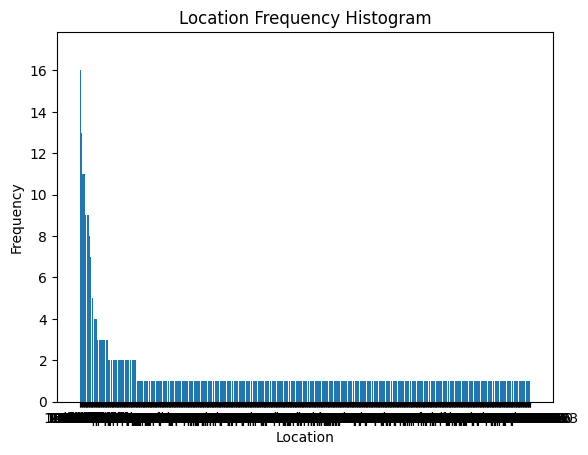

In [128]:
import matplotlib.pyplot as plt

def convert_df_column_values_to_frequesncy_to_draw_hist(df, column_name):
  return df[column_name].value_counts().to_dict()

frequency_dict = convert_df_column_values_to_frequesncy_to_draw_hist(df, 'Location')
names = list(frequency_dict.keys())
values = list(frequency_dict.values())

plt.bar(range(len(frequency_dict)), values, tick_label=names)
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.title("Location Frequency Histogram")
plt.show()

In [130]:
def write_to_csv(df):
  df.to_csv('modified_mock_data_csv', index=False)

In [131]:
write_to_csv(df)

## Budget Management
● Enable users to set a budget for each event and record expenses under categories like:
○ Venue.
○ Catering.
○ Entertainment.
○ Miscellaneous.
● Calculate remaining budget and flag when expenses exceed the allocated amount

Enable users to set a budget for each event and record expenses under categories like:
○ Venue.
○ Catering.
○ Entertainment.
○ Miscellaneous.


In [136]:
import pandas as pd

def add_budget_and_expenses(df):
    """
    Adds budget and expense tracking to the event data.
    """

    event_name = input("Enter the event name to add budget and expenses: ")

    event_index = df[df['event_name'] == event_name].index

    if event_index.empty:
        print(f"Event '{event_name}' not found.")
        return df

    try:
        budget = float(input(f"Enter the budget for '{event_name}': "))
    except ValueError:
        print("Invalid budget amount. Please enter a number.")
        return df

    expenses = {}
    categories = ['Venue', 'Catering', 'Entertainment', 'Miscellaneous']
    for category in categories:
        while True:
          try:
            expense = float(input(f"Enter expense for {category}: "))
            expenses[category] = expense
            break
          except ValueError:
            print("Invalid expense amount. Please enter a number.")

    df.loc[event_index, 'Budget'] = budget
    for category, expense in expenses.items():
        df.loc[event_index, category] = expense

    df['Remaining Budget'] = df['Budget'] - df[['Venue', 'Catering', 'Entertainment', 'Miscellaneous']].sum(axis=1)

    return df


In [133]:
df = add_budget_and_expenses(df)

Enter the event name to add budget and expenses: Birthday Party
Enter the budget for 'Birthday Party': 10000
Enter expense for Venue: 5000
Enter expense for Catering: 3000
Enter expense for Entertainment: 1000
Enter expense for Miscellaneous: 2000


In [137]:
print(df)

           event_name Date_&_time   Location  \
0      Birthday Party  05/01/2024   Suite 41   
1      Art Exhibition  07/01/2024   Room 782   
2    Fitness Bootcamp  11/10/2024  7th Floor   
3       Cooking Class  11/11/2024   Suite 73   
4       Cooking Class  15/11/2024   Suite 77   
..                ...         ...        ...   
995     Cooking Class  04/02/2024  1st Floor   
996      Charity Gala  15/02/2024   Apt 1575   
997     Cooking Class  12/06/2024   Apt 1005   
998    Film Screening  14/09/2024    Room 66   
999    Art Exhibition  30/10/2024   Room 203   

                                           Description   Budget   Venue  \
0    Mauris lacinia sapien quis libero. Nullam sit ...  10000.0  5000.0   
1    Nam dui. Proin leo odio, porttitor id, consequ...      NaN     NaN   
2    Duis bibendum, felis sed interdum venenatis, t...      NaN     NaN   
3    Duis at velit eu est congue elementum. In hac ...      NaN     NaN   
4    In tempor, turpis nec euismod scelerisque, 

In [138]:
df['Budget Exceeded'] = df['Remaining Budget'] < 0
df

,event_name,Date_&_time,Location,Description,Budget,Venue,Catering,Entertainment,Miscellaneous,Remaining Budget,Budget Exceeded
0,Birthday Party,05/01/2024,Suite 41,Mauris lacinia sapien quis libero. Nullam sit ...,10000.0,5000.0,3000.0,1000.0,2000.0,-1000.0,True
1,Art Exhibition,07/01/2024,Room 782,"Nam dui. Proin leo odio, porttitor id, consequ...",NaN,NaN,NaN,NaN,NaN,NaN,False
2,Fitness Bootcamp,11/10/2024,7th Floor,"Duis bibendum, felis sed interdum venenatis, t...",NaN,NaN,NaN,NaN,NaN,NaN,False
3,Cooking Class,11/11/2024,Suite 73,Duis at velit eu est congue elementum. In hac ...,NaN,NaN,NaN,NaN,NaN,NaN,False
4,Cooking Class,15/11/2024,Suite 77,"In tempor, turpis nec euismod scelerisque, qua...",NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
995,Cooking Class,04/02/2024,1st Floor,Vivamus in felis eu sapien cursus vestibulum. ...,NaN,NaN,NaN,NaN,NaN,NaN,False
996,Charity Gala,15/02/2024,Apt 1575,Vestibulum ac est lacinia nisi venenatis trist...,NaN,NaN,NaN,NaN,NaN,NaN,False
997,Cooking Class,12/06/2024,Apt 1005,Ut at dolor quis odio consequat varius. Intege...,NaN,NaN,NaN,NaN,NaN,NaN,False
998,Film Screening,14/09/2024,Room 66,"Morbi sem mauris, laoreet ut, rhoncus aliquet,...",NaN,NaN,NaN,NaN,NaN,NaN,False
